In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DataDir="/content/drive/MyDrive/BASEDATA/Train"
DataDirTest="/content/drive/MyDrive/BASEDATA/Test"
categories=["CAR","DOOR","STAIRS"]

img_size=50
training_data= []
testing_data= []
def create_data():
    for category in categories:
        pathTrain = os.path.join(DataDir,category)
        pathTest = os.path.join(DataDirTest,category)
        class_num = categories.index(category)
        for img in os.listdir(pathTrain):
            try:
                # img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.imread(os.path.join(pathTrain,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass  
        for img in os.listdir(pathTest):
            try:
                img_array = cv2.imread(os.path.join(pathTest,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass    
        
create_data()   

In [5]:
import random
random.shuffle(training_data)
random.shuffle(testing_data)

In [6]:
x_train = []
y_train = []
x_test = []
y_test = []

for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
x_train = np.array(x_train).reshape(-1,img_size,img_size,3)  
y_train= np.array(y_train)  

for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1,img_size,img_size,3) 
y_test= np.array(y_test)

In [7]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [8]:
x_train = x_train/255  # scale down rgb values in range of 0 to 1
x_test = x_test/255

In [9]:
from tensorflow.python.keras.layers.pooling import MaxPooling2D
# from tensorflow.python.keras.backend import conv2d
cnn = models.Sequential([
      #cnn       
      layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(50,50,3)),
      layers.MaxPooling2D((3,3)),

      layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D((3,3)),

      #dense            
      layers.Flatten(),
      layers.Dense(100,activation='relu'),
      layers.Dense(300,activation='relu'), 
      layers.Dense(3,activation='softmax')              
])


In [10]:
cnn.compile(
    optimizer ='nadam',
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [14]:
cnn.fit(x_train,y_train,epochs=30)

Epoch 1/30
31/31 [==============================] - 2s 73ms/step - loss: 0.1898 - accuracy: 0.9453
Epoch 2/30
31/31 [==============================] - 2s 68ms/step - loss: 0.2150 - accuracy: 0.9312
Epoch 3/30
31/31 [==============================] - 2s 66ms/step - loss: 0.0948 - accuracy: 0.9798
Epoch 4/30
31/31 [==============================] - 2s 69ms/step - loss: 0.0612 - accuracy: 0.9838
Epoch 5/30
31/31 [==============================] - 2s 65ms/step - loss: 0.0645 - accuracy: 0.9868
Epoch 6/30
31/31 [==============================] - 2s 65ms/step - loss: 0.0537 - accuracy: 0.9879
Epoch 7/30
31/31 [==============================] - 2s 65ms/step - loss: 0.0306 - accuracy: 0.9919
Epoch 8/30
31/31 [==============================] - 2s 66ms/step - loss: 0.0230 - accuracy: 0.9960
Epoch 9/30
31/31 [==============================] - 2s 66ms/step - loss: 0.0251 - accuracy: 0.9949
Epoch 10/30
31/31 [==============================] - 2s 65ms/step - loss: 0.0137 - accuracy: 0.9980
Epoch 11/

In [15]:
#evaluation using testing data
cnn.evaluate(x_test,y_test)

4/4 [==============================] - 0s 29ms/step - loss: 0.9550 - accuracy: 0.8250


[0.9549973607063293, 0.824999988079071]

In [16]:
#evaluation using training data
cnn.evaluate(x_train,y_train)

31/31 [==============================] - 1s 21ms/step - loss: 0.0017 - accuracy: 0.9990


[0.00174512283410877, 0.9989878535270691]

In [17]:
import pickle

In [ ]:
#exporting model
filename = 'cnn.sav'
pickle.dump(cnn, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://8c9659b5-8d74-41d2-a2d2-720df7ef2741/assets


In [18]:
y_predicted = cnn.predict(x_test)
y_predicted[:5]

array([[4.0075979e-01, 2.5005310e-03, 5.9673971e-01],
       [9.9999964e-01, 2.1264350e-09, 3.0068497e-07],
       [9.9999940e-01, 3.2336709e-07, 2.9224566e-07],
       [3.3223453e-01, 2.9717407e-01, 3.7059149e-01],
       [9.5003021e-01, 2.3503428e-02, 2.6466379e-02]], dtype=float32)

In [19]:
y_classes = [np.argmax(i) for i in y_predicted]
y_classes[:5]

[2, 0, 0, 2, 0]

In [20]:
y_test[:5]

array([2, 0, 0, 1, 0])

In [21]:
def plot_sample(x,y,index):
    plt.figure(figsize=(50,30))
    plt.imshow(x[index])
    plt.xlabel(categories[y[index]])

In [22]:
y_classes=np.array(y_classes)
y_classes[:10]

array([2, 0, 0, 2, 0, 1, 2, 1, 1, 2])

In [ ]:
# for i in range(10):
#     plot_sample(x_test,y_test,i)

In [ ]:
# for i in range(10):
#     plot_sample(x_test,y_classes,i)

STAIRS


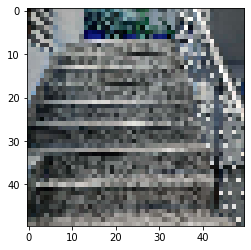

In [23]:
img_array = cv2.imread("/content/drive/MyDrive/BASEDATA/Test/STAIRS/P-WhiteStairs202176181039.jpg")
new_array = cv2.resize(img_array,(img_size,img_size))
z = np.array(new_array).reshape(-1,img_size,img_size,3) 
y_predicted = cnn.predict(z)
y_classes =np.argmax(y_predicted) 
print(categories[y_classes])
plt.imshow(new_array)

In [24]:
!pip install gtts
!pip install playsound==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from gtts import gTTS
from IPython.display import Audio 

In [26]:
from skimage import io
url = 'https://media.wired.com/photos/5d09594a62bcb0c9752779d9/1:1/w_1500,h_1500,c_limit/Transpo_G70_TA-518126.jpg'
img_array = io.imread(url)
new_array = cv2.resize(img_array,(img_size,img_size))
z = np.array(new_array).reshape(-1,img_size,img_size,3) 
y_predicted = cnn.predict(z)
y_classes =np.argmax(y_predicted) 

In [27]:
mytext = "be careful! in front of you there is "+categories[y_classes]
lan = 'en'
output =gTTS(text=mytext,lang=lan, slow=False, tld="co.uk")

CAR


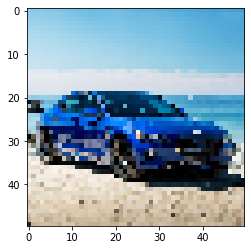

In [ ]:
print(categories[y_classes])
plt.imshow(new_array)
output.save("output2.mp3")
sound_file = 'output2.mp3'
Audio(sound_file, autoplay=True)

In [28]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2
import PIL
import io
import html
import time
from base64 import b64decode, b64encode

In [29]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [30]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data) 
#   cv2.imwrite(filename, img)
  return img

<IPython.core.display.Javascript object>

STAIRS


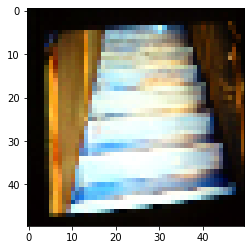

In [43]:
try:
  img = take_photo('photo.jpg')
  # Show the image which was just taken.
  new_array = cv2.resize(img,(img_size,img_size))
  z = np.array(new_array).reshape(-1,img_size,img_size,3) 
  y_predicted = cnn.predict(z)
  y_classes =np.argmax(y_predicted)
  if(categories[y_classes]=='CAR'):
    wn=Audio('/content/drive/MyDrive/TextToSpeech/CAR.mp3', autoplay=True)
    display(wn)

  elif(categories[y_classes]=='STAIRS'):
    wn=Audio('/content/drive/MyDrive/TextToSpeech/STAIRS.mp3', autoplay=True)
    display(wn)

  elif(categories[y_classes]=='DOOR'):
    wn=Audio('/content/drive/MyDrive/TextToSpeech/DOOR.mp3', autoplay=True)
    display(wn)

  print(categories[y_classes])
  plt.imshow(new_array)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
from IPython.display import Audio
from IPython.display import display

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    time.sleep(5) 
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    new_array = cv2.resize(img,(img_size,img_size))
    z = np.array(new_array).reshape(-1,img_size,img_size,3) 
    y_predicted = cnn.predict(z)
    y_classes =np.argmax(y_predicted)
    if(categories[y_classes]=='CAR'):
        wn=Audio('/content/drive/MyDrive/TextToSpeech/CAR.mp3', autoplay=True)
        display(wn)
   
        # break 
    elif(categories[y_classes]=='STAIRS'):
        wn=Audio('/content/drive/MyDrive/TextToSpeech/STAIRS.mp3', autoplay=True)
        display(wn)
        # break
        
    elif(categories[y_classes]=='DOOR'):
        wn=Audio('/content/drive/MyDrive/TextToSpeech/DOOR.mp3', autoplay=True)
        display(wn)
        # break    
    print(categories[y_classes])
    time.sleep(20)     

<IPython.core.display.Javascript object>

STAIRS


CAR


DOOR
